### Connecting to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Downloading Dataset from Google Drive

In [2]:
!unzip /content/drive/MyDrive/BDA/dataset.zip
!unzip /content/combined-data.zip -d /content/dataset2
!unzip /content/flamingo-data.zip -d /content/dataset3

Archive:  /content/drive/MyDrive/Work/Manzoor/BDA/dataset.zip
  inflating: chat-data.zip           
  inflating: combined-data.zip       
  inflating: dataset_attribute_desc.doc  
  inflating: flamingo-data.zip       
Archive:  /content/combined-data.zip
  inflating: /content/dataset2/combined-data.csv  
Archive:  /content/flamingo-data.zip
  inflating: /content/dataset3/ad-clicks.csv  
  inflating: /content/dataset3/buy-clicks.csv  
  inflating: /content/dataset3/game-clicks.csv  
  inflating: /content/dataset3/level-events.csv  
  inflating: /content/dataset3/team-assignments.csv  
  inflating: /content/dataset3/team.csv  
  inflating: /content/dataset3/user-session.csv  
  inflating: /content/dataset3/users.csv  


## Importing Required Packages

In [42]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

## Loading Datasets

In [4]:
combined_data = pd.read_csv('/content/dataset2/combined-data.csv')
print(combined_data.shape)
combined_data.head()

(4619, 8)


,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
0,812,5648,1,android,69,8,NaN,NaN
1,1658,5649,1,iphone,31,5,NaN,NaN
2,1589,5650,1,iphone,26,2,NaN,NaN
3,1863,5651,1,android,35,4,NaN,NaN
4,937,5652,1,android,39,0,1.0,1.0


In [5]:
ad_clicks = pd.read_csv('/content/dataset3/ad-clicks.csv')
print(ad_clicks.shape)
ad_clicks.head()

(16323, 7)


,timestamp,txId,userSessionId,teamId,userId,adId,adCategory
0,2016-05-26 15:13:22,5974,5809,27,611,2,electronics
1,2016-05-26 15:17:24,5976,5705,18,1874,21,movies
2,2016-05-26 15:22:52,5978,5791,53,2139,25,computers
3,2016-05-26 15:22:57,5973,5756,63,212,10,fashion
4,2016-05-26 15:22:58,5980,5920,9,1027,20,clothing


In [6]:
buy_clicks = pd.read_csv('/content/dataset3/buy-clicks.csv')
print(buy_clicks.shape)
buy_clicks.head()

(2947, 7)


,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0


In [7]:
game_clicks = pd.read_csv('/content/dataset3/game-clicks.csv')
print(game_clicks.shape)
game_clicks.head()

(755806, 7)


,timestamp,clickId,userId,userSessionId,isHit,teamId,teamLevel
0,2016-05-26 15:06:55,105,1038,5916,0,25,1
1,2016-05-26 15:07:09,154,1099,5898,0,44,1
2,2016-05-26 15:07:14,229,899,5757,0,71,1
3,2016-05-26 15:07:14,322,2197,5854,0,99,1
4,2016-05-26 15:07:20,22,1362,5739,0,13,1


In [8]:
level_events = pd.read_csv('/content/dataset3/level-events.csv')
print(level_events.shape)
level_events.head()

(1254, 5)


,timestamp,eventId,teamId,teamLevel,eventType
0,2016-05-27 23:06:54,0,2,1,end
1,2016-05-27 23:06:54,1,2,2,start
2,2016-05-27 23:06:54,2,8,1,end
3,2016-05-27 23:06:54,3,8,2,start
4,2016-05-27 23:06:54,4,9,1,end


In [9]:
team_assignments = pd.read_csv('/content/dataset3/team-assignments.csv')
print(team_assignments.shape)
team_assignments.head()

(9826, 4)


,timestamp,team,userId,assignmentId
0,2016-05-26 14:06:54,64,504,5439
1,2016-05-26 14:07:00,39,1698,5301
2,2016-05-26 14:07:04,85,81,5540
3,2016-05-26 14:07:08,95,1976,5307
4,2016-05-26 14:07:09,97,1009,5368


In [10]:
team = pd.read_csv('/content/dataset3/team.csv')
print(team.shape)
team.head()

(109, 6)


,teamId,name,teamCreationTime,teamEndTime,strength,currentLevel
0,79,O1uJX7C,2016-06-12 15:33:27,9999-12-31 23:59:59,0.774474,1
1,92,WeLHp8HZ,2016-06-12 21:54:20,9999-12-31 23:59:59,0.171926,1
2,6,mARlfz,2016-06-12 23:02:16,9999-12-31 23:59:59,0.537353,1
3,7,xO41jlAo0Y,2016-06-13 06:03:03,9999-12-31 23:59:59,0.394370,1
4,40,vdwO0k1,2016-06-13 07:01:03,9999-12-31 23:59:59,0.706833,1


In [11]:
user_session = pd.read_csv('/content/dataset3/user-session.csv')
print(user_session.shape)
user_session.head()

(9250, 8)


,timestamp,userSessionId,userId,teamId,assignmentId,sessionType,teamLevel,platformType
0,2016-05-26 14:47:30,5675,170,90,5423,start,1,iphone
1,2016-05-27 00:06:54,5675,170,90,5423,end,1,iphone
2,2016-05-26 14:43:09,5795,835,39,5300,start,1,android
3,2016-05-27 08:06:54,5795,835,39,5300,end,1,android
4,2016-05-26 14:47:20,5833,624,2,5529,start,1,iphone


In [12]:
users = pd.read_csv('/content/dataset3/users.csv')
print(users.shape)
users.head()

(2393, 6)


,timestamp,userId,nick,twitter,dob,country
0,2012-06-19 14:53:41,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA
1,2012-06-19 19:29:01,949,vAOfUkf,@nkkNo,1971-04-22,HU
2,2012-06-20 19:34:59,1654,qOOXSQ,@SwOlw,1970-04-19,IS
3,2012-06-21 01:18:29,1586,px4gW51,@IrCHTnE,1965-11-23,AM
4,2012-06-21 15:35:00,599,9gkfwRC73Uc,@VJj0Az,1994-08-23,CC


## Preprocessing Data

### Adding Additional Columns

In [13]:
# Defining additional columns to add from different other tables to the dataset 
user_session_cols = ['userSessionId',	'userId',	'teamId']
user_additional_cols = ['userId','country']
team_additional_cols = ['teamId','strength']

# Joining other tables with the dataset to add additional columns in the dataset 
combined_data = combined_data.merge(user_session[user_session_cols],on=['userSessionId',	'userId'],how='left').drop_duplicates()
combined_data = combined_data.merge(users[user_additional_cols],on=['userId'],how='left').drop_duplicates()
combined_data = combined_data.merge(team[team_additional_cols],on=['teamId'],how='left').drop_duplicates()

# Creating new columns in the dataset 
# Accuracy rate shows the ratio of total hits and game clicks 
combined_data['accuracyRate'] = combined_data['count_hits'] / combined_data['count_gameclicks']
# Revenue is the product of average price and total items bought in each session
combined_data['revenue'] = combined_data['avg_price'].fillna(0) * combined_data['count_buyId'].fillna(0)
# User category is label column that defines if a user is Budget Spender or High Spender 
combined_data['user_category'] = np.where(combined_data['revenue'] > 10, 'HighSpender', 'BudgetSpender')

### Filling Null Values

In [14]:
# Checking null values in the data
combined_data.isna().sum()

userId                 0
userSessionId          0
teamLevel              0
platformType           0
count_gameclicks       0
count_hits             0
count_buyId         3208
avg_price           3208
teamId                 0
country               25
strength            1166
accuracyRate           0
revenue                0
user_category          0
dtype: int64

In [15]:
# Filling null values in the data
combined_data['count_buyId'] = combined_data.count_buyId.fillna(value=0)
combined_data['avg_price'] = combined_data.avg_price.fillna(value=0)
combined_data['country'] = combined_data.country.fillna(value=combined_data.country.mode()[0])
combined_data['strength'] = combined_data.strength.fillna(value=combined_data.strength.mean())

In [16]:
# Rechecking if there is any column still having null values 
combined_data.isna().sum()

userId              0
userSessionId       0
teamLevel           0
platformType        0
count_gameclicks    0
count_hits          0
count_buyId         0
avg_price           0
teamId              0
country             0
strength            0
accuracyRate        0
revenue             0
user_category       0
dtype: int64

### Categorical vs Numerical Columns

In [17]:
# Seprating Numerical and Categorical Columns
category_variables = ['userId', 'userSessionId', 'teamLevel', 'platformType','teamId','country','user_category']
continuous_variables = ['count_gameclicks', 'count_hits', 'count_buyId', 'avg_price','strength','accuracyRate','revenue']

In [18]:
# Changing the data type of categorical columns to "category"
combined_data[category_variables] = combined_data[category_variables].astype('category')

## Exploratory Data Analysis

In [19]:
# Displaying final dataset
print(combined_data.shape)
combined_data.head()

(4619, 14)


,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,teamId,country,strength,accuracyRate,revenue,user_category
0,812,5648,1,android,69,8,0.0,0.0,36,DO,0.642122,0.115942,0.0,BudgetSpender
1,1658,5649,1,iphone,31,5,0.0,0.0,18,VE,0.885470,0.161290,0.0,BudgetSpender
2,1589,5650,1,iphone,26,2,0.0,0.0,22,LT,0.472692,0.076923,0.0,BudgetSpender
3,1863,5651,1,android,35,4,0.0,0.0,53,PK,0.237000,0.114286,0.0,BudgetSpender
4,937,5652,1,android,39,0,1.0,1.0,11,ZM,0.049593,0.000000,1.0,BudgetSpender


### Statistical Analysis on the Dataset

In [20]:
# Displaying top categories and frequencies of these categories 
combined_data[category_variables].describe()

,userId,userSessionId,teamLevel,platformType,teamId,country,user_category
count,4619,4619,4619,4619,4619,4619,4619
unique,1091,4619,8,5,109,240,2
top,1815,5648,6,iphone,22,CA,BudgetSpender
freq,8,1,819,1934,191,70,4120


In [21]:
# Displaying 5-Number summay and relevant statistics
combined_data[continuous_variables].describe()

,count_gameclicks,count_hits,count_buyId,avg_price,strength,accuracyRate,revenue
count,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000
mean,143.063001,15.705780,0.514181,2.203813,0.517059,0.111261,3.678108
std,126.883397,13.986902,0.921311,4.908154,0.248146,0.040314,9.003419
min,1.000000,0.000000,0.000000,0.000000,0.013275,0.000000,0.000000
25%,70.000000,7.000000,0.000000,0.000000,0.350677,0.089286,0.000000
50%,107.000000,12.000000,0.000000,0.000000,0.517059,0.109091,0.000000
75%,162.500000,19.000000,1.000000,1.710000,0.668180,0.130544,2.000000
max,1207.000000,121.000000,6.000000,20.000000,0.952176,1.000000,100.000000


In [22]:
print(f"There are total {len(combined_data.teamId.unique())} teams in the data.")
print(f"There are total {len(combined_data.userId.unique())} users in the data.")
print(f"There are total {len(combined_data.userSessionId.unique())} user sessions in the data.")
print()
print(f"Total game clicks by users: {combined_data.count_gameclicks.sum()}")
print(f"Average game clicks by user: {combined_data.count_gameclicks.sum()/len(combined_data.userId.unique())}")
print(f"Average game clicks in sessions: {combined_data.count_gameclicks.sum()/len(combined_data.userSessionId.unique())}")
print(f"Average game clicks by team: {combined_data.count_gameclicks.sum()/len(combined_data.teamId.unique())}")
print()
print(f"Total purchases by users: {combined_data.count_buyId.sum()}")
print(f"Average purchases by user: {combined_data.count_buyId.sum()/len(combined_data.userId.unique())}")
print(f"Average purchases in sessions: {combined_data.count_buyId.sum()/len(combined_data.userSessionId.unique())}")
print(f"Average purchases by team: {combined_data.count_buyId.sum()/len(combined_data.teamId.unique())}")
print()
print(f"Total revenue generated: {buy_clicks.price.sum()}")
print(f"Average money spent by user: {buy_clicks.price.sum()/len(combined_data.userId.unique())}")
print(f"Average money spent in sessions: {buy_clicks.price.sum()/len(combined_data.userSessionId.unique())}")
print(f"Average money spent by team: {buy_clicks.price.sum()/len(combined_data.teamId.unique())}")

There are total 109 teams in the data.
There are total 1091 users in the data.
There are total 4619 user sessions in the data.

Total game clicks by users: 660808
Average game clicks by user: 605.6901924839597
Average game clicks in sessions: 143.06300064949124
Average game clicks by team: 6062.45871559633

Total purchases by users: 2375.0
Average purchases by user: 2.176901924839597
Average purchases in sessions: 0.5141805585624594
Average purchases by team: 21.788990825688074

Total revenue generated: 21407.0
Average money spent by user: 19.621448212648946
Average money spent in sessions: 4.634552933535398
Average money spent by team: 196.39449541284404


### Correlation Analysis

<Axes: >

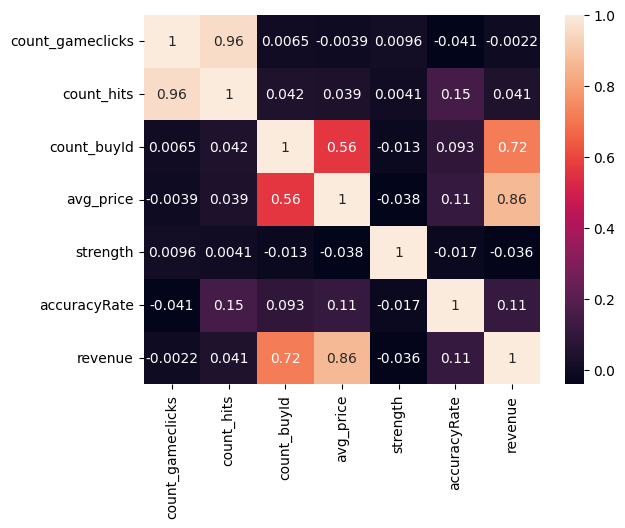

In [23]:
### pearson correlation among numerical data
sns.heatmap(combined_data[continuous_variables].corr(),annot=True)

### Visualization Analysis

#### Top 10 countries by revenue 

<ipython-input-24-5eac3a548b4c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined_data.groupby(['country']).sum()['revenue'].sort_values()[::-1][:10].plot(kind='bar',ylabel='revenue')


<Axes: xlabel='country', ylabel='revenue'>

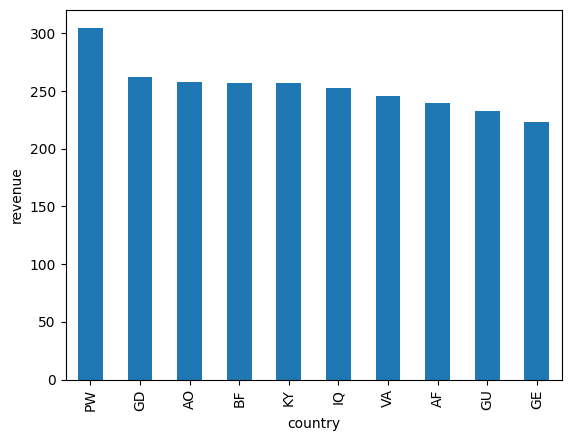

In [24]:
combined_data.groupby(['country']).sum()['revenue'].sort_values()[::-1][:10].plot(kind='bar',ylabel='revenue')

#### Top 10 teams by revenue

<ipython-input-25-541f6064a23b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined_data.groupby(['teamId']).sum()['revenue'].sort_values()[::-1][:10].plot(kind='bar',ylabel='revenue')


<Axes: xlabel='teamId', ylabel='revenue'>

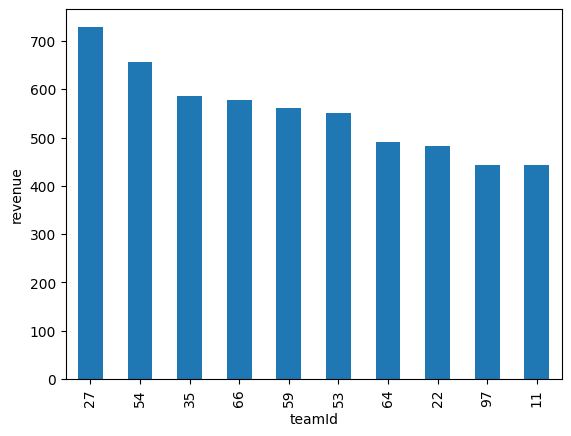

In [25]:
combined_data.groupby(['teamId']).sum()['revenue'].sort_values()[::-1][:10].plot(kind='bar',ylabel='revenue')

<ipython-input-26-9d1c87bde887>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined_data.groupby('teamLevel').sum()['revenue'].sort_values()[::-1][:-1].plot(kind='bar',ylabel='revenue')


<Axes: xlabel='teamLevel', ylabel='revenue'>

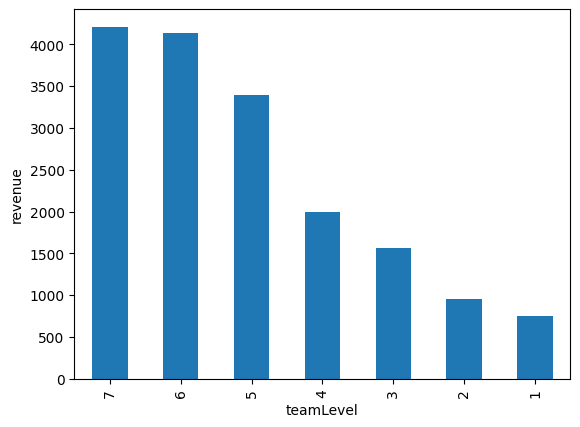

In [26]:
#revenue by team_level 
combined_data.groupby('teamLevel').sum()['revenue'].sort_values()[::-1][:-1].plot(kind='bar',ylabel='revenue')

#### Total Purchases by Different User Categories

<Axes: xlabel='teamLevel', ylabel='count_buyId'>

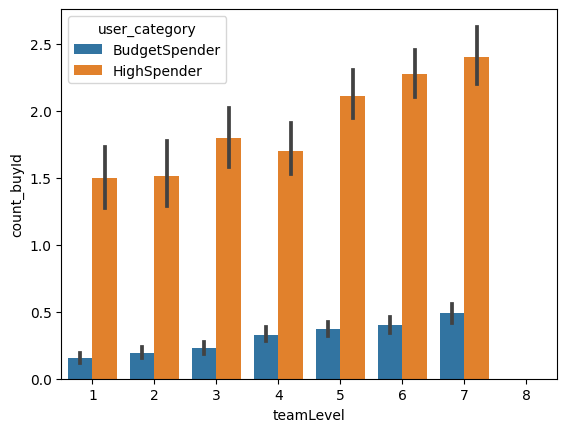

In [27]:
sns.barplot(x='teamLevel',y='count_buyId',hue='user_category',data=combined_data)

#### User Categories 

<Axes: >

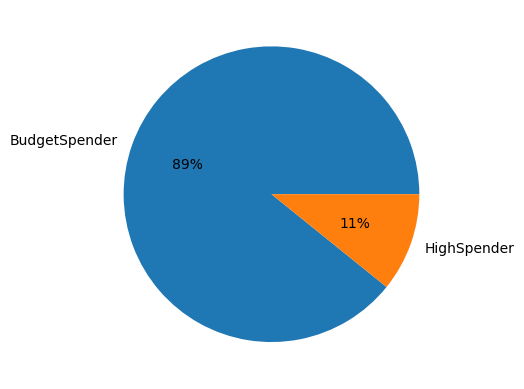

In [28]:
combined_data.user_category.value_counts().plot(kind='pie',ylabel="",autopct="%.0f%%")

#### Most Important Platforms

<ipython-input-29-4e64c60d95af>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined_data.groupby('platformType').sum()['count_buyId'].sort_values()[::-1].plot(kind='pie',autopct="%.0f%%",ylabel="")


<Axes: >

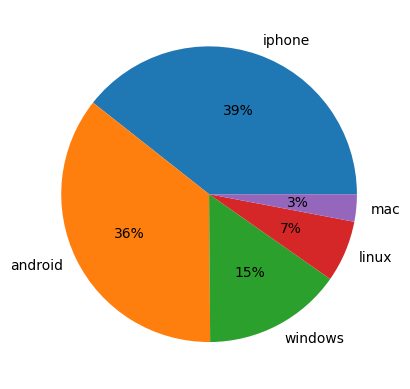

In [29]:
combined_data.groupby('platformType').sum()['count_buyId'].sort_values()[::-1].plot(kind='pie',autopct="%.0f%%",ylabel="")

<ipython-input-30-faf78c7a4901>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined_data.groupby('platformType').sum()['revenue'].sort_values()[::-1].plot(kind='pie',autopct="%.0f%%",ylabel="")


<Axes: >

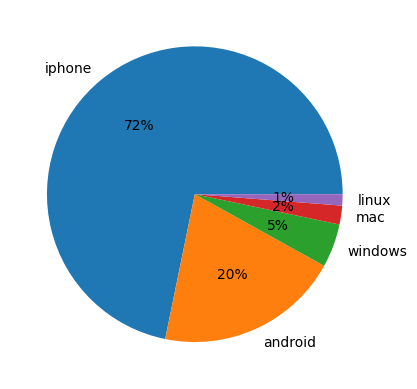

In [30]:
combined_data.groupby('platformType').sum()['revenue'].sort_values()[::-1].plot(kind='pie',autopct="%.0f%%",ylabel="")

#### Distribution of Revenue

<ipython-input-31-26b80bf272f9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data[['revenue']],bins=20)


<Axes: ylabel='Density'>

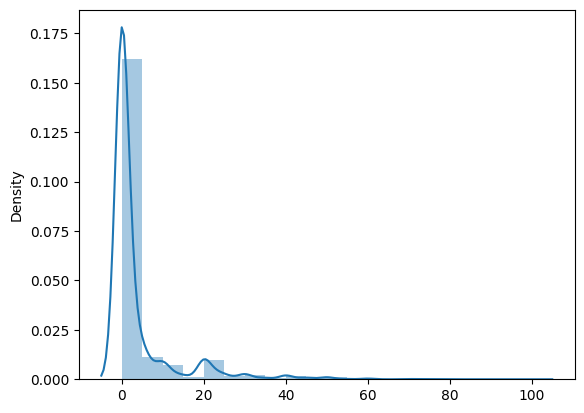

In [31]:
sns.distplot(combined_data[['revenue']],bins=20)

#### Distribution of team strength

<ipython-input-32-c5d6cf01e6dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data[['strength']])


<Axes: ylabel='Density'>

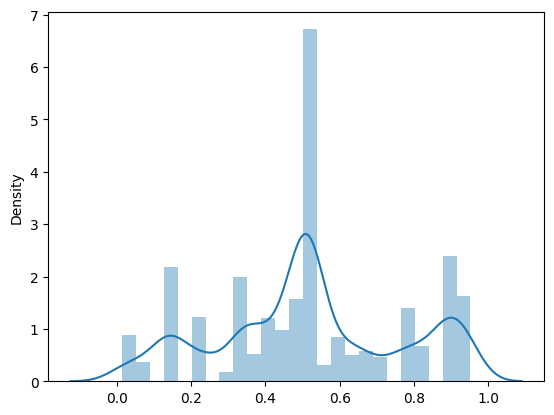

In [32]:
sns.distplot(combined_data[['strength']])

#### Ad Categories 

<Axes: >

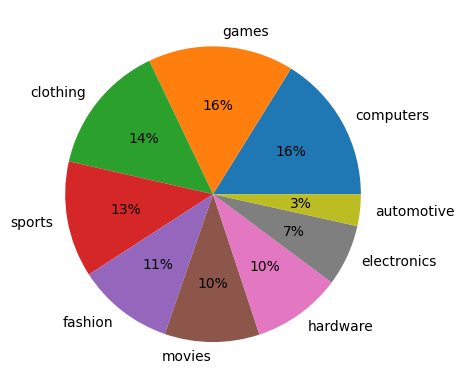

In [33]:
# most common ads category
ad_clicks.adCategory.value_counts().plot(kind='pie',autopct="%.0f%%",ylabel="")

#### Purchased items 

<Axes: >

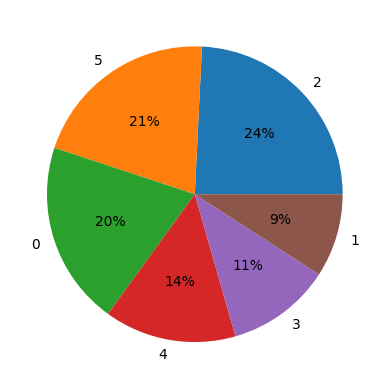

In [34]:
buy_clicks.buyId.value_counts().plot(kind='pie',autopct="%.0f%%",ylabel="")

### Classification


### Setup SparkML

In [35]:
# Installing Java, Hadoop and Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [36]:
# Setting environment variables 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [37]:
# Iniating Spark Session
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark

### Training Decision Trees Classifier

In [38]:
from pyspark.ml.feature import StandardScaler, StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# category codes
combined_data['country'] = combined_data['country'].astype('category').cat.codes

# Convert pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(combined_data)

# Preprocess the data
# Perform string indexing on categorical columns
indexer = StringIndexer(inputCols=["platformType", "teamLevel", "user_category"], outputCols=["platformType_indexed", "team_level_indexed", "user_category_indexed"])
indexed_df = indexer.fit(spark_df).transform(spark_df)

# Assemble the features into a vector
assembler = VectorAssembler(inputCols=["team_level_indexed", "platformType_indexed", "count_gameclicks", "count_hits", "count_buyId", "teamId", "country", "strength"], outputCol="features")
preprocessed_df = assembler.transform(indexed_df)

# Split the data into training and testing sets
train_data, test_data = preprocessed_df.randomSplit([0.8, 0.2], seed=42)

# Scale the features using StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(train_data)
scaled_train_data = scaler_model.transform(train_data)
scaled_test_data = scaler_model.transform(test_data)

# Train a classification model (e.g., Decision Tree) using scaled features
rf = DecisionTreeClassifier(labelCol="user_category_indexed", featuresCol="scaled_features")
classification_model = rf.fit(scaled_train_data)

/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:331: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


### Evaluating performance of decision tree model

Accuracy: 0.940628637951106
Precision: 0.8533349378741839
Recall: 0.8297257081894495
F1 Score: 0.8409726986616137
ROC AUC Score: 0.8297257081894495
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       766
         1.0       0.74      0.69      0.72        93

    accuracy                           0.94       859
   macro avg       0.85      0.83      0.84       859
weighted avg       0.94      0.94      0.94       859



<Axes: >

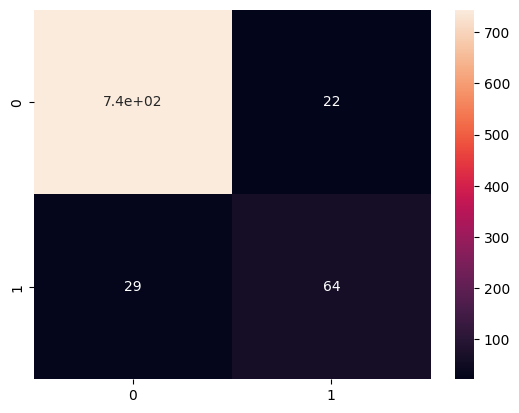

In [46]:
# Make predictions
predictions = classification_model.transform(scaled_test_data)
predictions = predictions.select('prediction').rdd.map(lambda x: x[0]).collect()

# Get true labels
true_labels = test_data.select('user_category_indexed').rdd.map(lambda x: x[0]).collect()

# Convert to NumPy arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Compute evaluation metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='macro')
recall = recall_score(true_labels, predictions, average='macro')
f1 = f1_score(true_labels, predictions, average='macro')
roc_auc = roc_auc_score(true_labels, predictions)
confusion = confusion_matrix(true_labels, predictions)
classification = classification_report(true_labels, predictions)

# Print results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC AUC Score:', roc_auc)
print('Classification Report:')
print(classification)

sns.heatmap(confusion, annot=True)

### Displaying Decision Tree

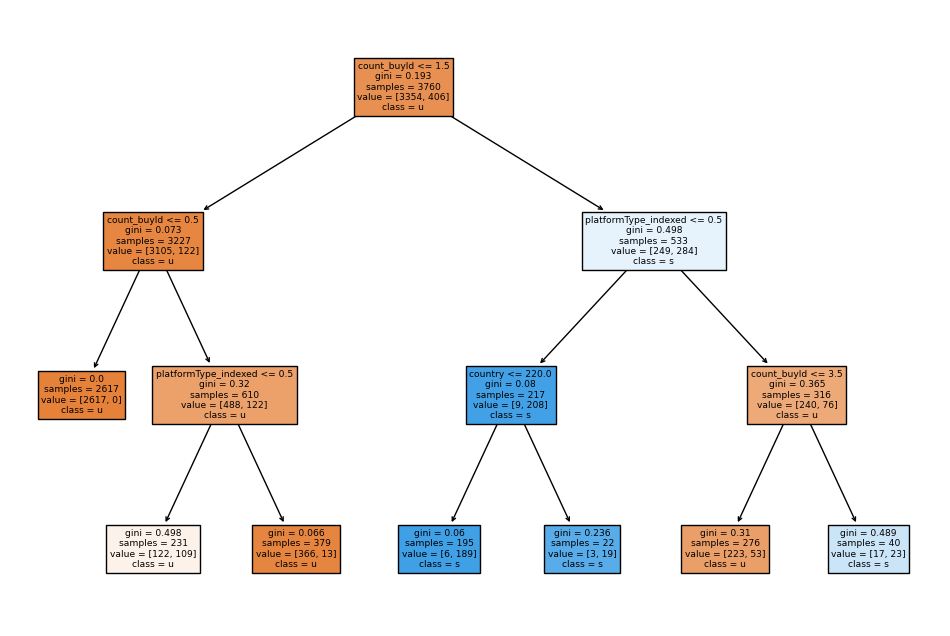

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

features = ['team_level_indexed',
 'platformType_indexed',
 'count_gameclicks',
 'count_hits',
 'count_buyId',
 'teamId',
 'country',
 'strength']

target = 'user_category_indexed'

train_X = train_data.select(features).toPandas()
train_y = train_data.select(target).toPandas()

# Train a decision tree model
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_X, train_y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=features, class_names=target, filled=True)
plt.show()

### Clustering 

In [73]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Convert Pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(combined_data)

# Select columns for clustering
selected_columns = ['teamLevel', 'accuracyRate', 'revenue']

# Subset the dataframe with selected columns
clustering_data = spark_df.select(selected_columns)

# Convert the features into a single vector column
assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")
clustering_data = assembler.transform(clustering_data)

# Perform clustering using K-means algorithm
num_clusters = 3  # Specify the number of clusters you want
kmeans = KMeans().setK(num_clusters).setSeed(42)
model = kmeans.fit(clustering_data)

# Add the cluster labels to the PySpark DataFrame
clusters = model.transform(clustering_data)
combined_data['cluster'] = clusters.select("prediction").toPandas()

# Get the cluster centers
cluster_centers = model.clusterCenters()

# Display the cluster centers
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1} center: {center}")

cdf = pd.DataFrame(np.array(cluster_centers))
cdf.index = ['Cluster 1', 'Cluster 2', 'Cluster 3']
cdf.columns = selected_columns
cdf

/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:331: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Cluster 1 center: [4.27039458 0.11002391 0.9869281 ]
Cluster 2 center: [ 5.55339806  0.13001888 45.87563107]
Cluster 3 center: [ 4.95064935  0.11951732 21.26490909]


,teamLevel,accuracyRate,revenue
Cluster 1,4.270395,0.110024,0.986928
Cluster 2,5.553398,0.130019,45.875631
Cluster 3,4.950649,0.119517,21.264909


### Ploting Clusters 

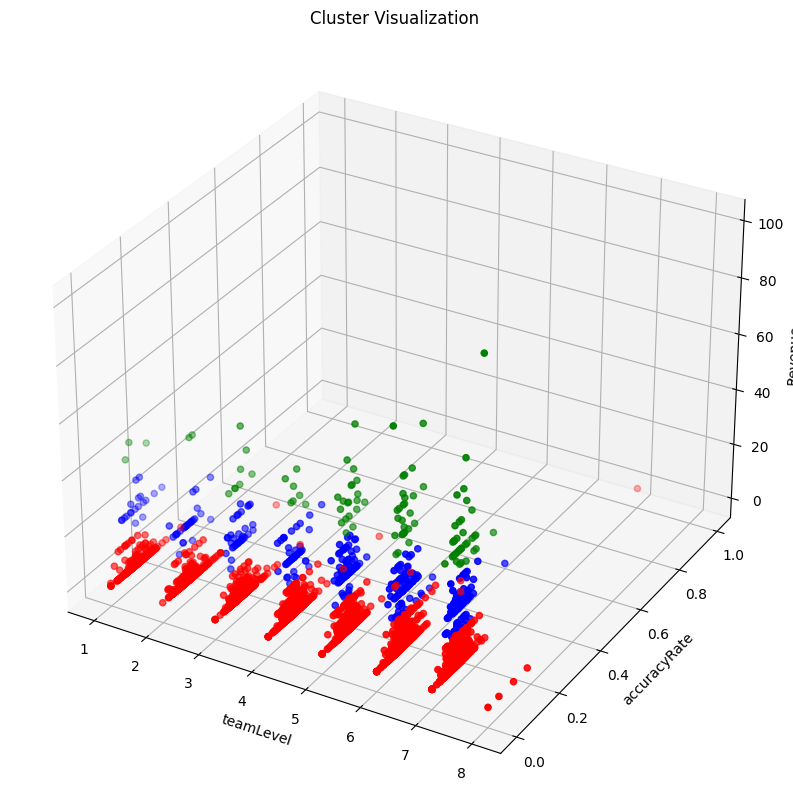

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to clusters
colors = ['r', 'g', 'b', 'c', 'm']

# Plot the data points with cluster labels
for cluster in range(num_clusters):
    cluster_data = combined_data[combined_data['cluster'] == cluster]
    ax.scatter(cluster_data['teamLevel'], cluster_data['accuracyRate'], cluster_data['revenue'], c=colors[cluster])

# Set labels and title
ax.set_xlabel('teamLevel')
ax.set_ylabel('accuracyRate')
ax.set_zlabel('Revenue')
ax.set_title('Cluster Visualization')

# Show the plot
plt.show()
